# **Introduction & Project Overview**


---


## Purpose & Objectives
The goal of this project is to analyze sales data to derive actionable business insights that can drive strategic decisions. This analysis focuses on uncovering sales trends, understanding customer demographics, and evaluating product performance.

## Data Source Description
The dataset, **sales_data.csv**, contains detailed sales transactions including:
- **Date Information:** Year, month, day.
- **Customer Demographics:** Age, gender, country, state.
- **Product Details:** Category, sub-category, product name.
- **Sales Metrics:** Order quantity, unit cost, unit price, profit, cost, and revenue.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sales_data.csv to sales_data.csv


In [4]:
import pandas as pd
import io

sales_data = pd.read_csv(io.BytesIO(uploaded['sales_data.csv']))

sales_data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# **Data Cleaning & Preparation**


In [5]:
print("Missing values per column")
print(sales_data.isnull().sum())

Missing values per column
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [6]:
sales_data['Profit_Margin'] = sales_data.apply(
    lambda row: row['Profit'] / row['Revenue'] if row['Revenue'] > 0 else 0, axis=1
)
print("\nCreated 'Profit_Margin' column.")


Created 'Profit_Margin' column.


In [7]:
sales_data.head()
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Customer_Gender   113036 non-null  object 
 7   Country           113036 non-null  object 
 8   State             113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Sub_Category      113036 non-null  object 
 11  Product           113036 non-null  object 
 12  Order_Quantity    113036 non-null  int64  
 13  Unit_Cost         113036 non-null  int64  
 14  Unit_Price        113036 non-null  int64  
 15  Profit            113036 non-null  int64  
 16  Cost              11

# **Exploratory Data Analysis**

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
print(sales_data.describe())

                 Day           Year   Customer_Age  Order_Quantity  \
count  113036.000000  113036.000000  113036.000000   113036.000000   
mean       15.665753    2014.401739      35.919212       11.901660   
std         8.781567       1.272510      11.021936        9.561857   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113036.000000  113036.000000  113036.000000  113036.000000   
mean      267.296366     452.938427     285.051665     469.318695   
std       549.835483     922.071219     453.887443     884.866118   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000    

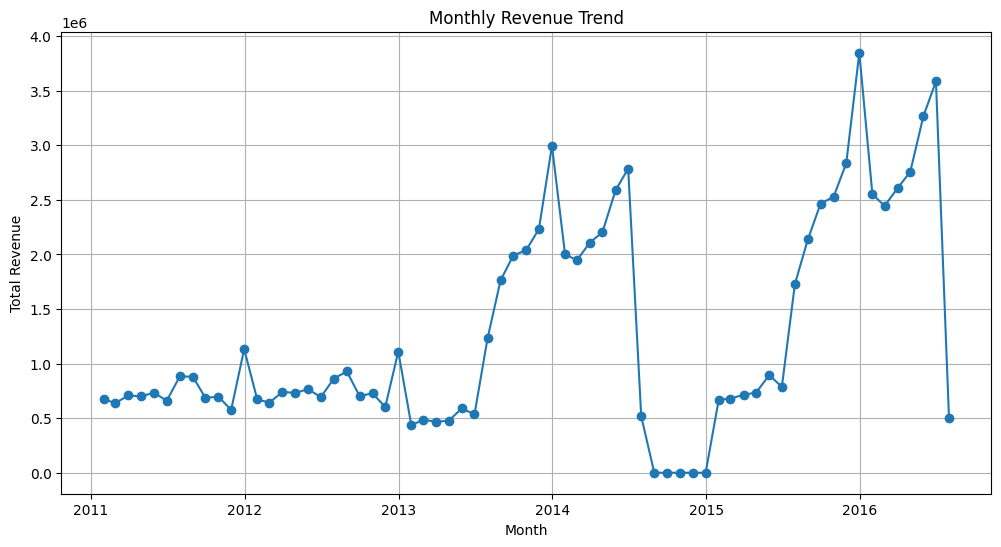

In [29]:
if 'Date' not in sales_data.columns:
    sales_data.reset_index(inplace=True)

sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

sales_data.set_index('Date', inplace=True)

monthly_revenue = sales_data['Revenue'].resample('ME').sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

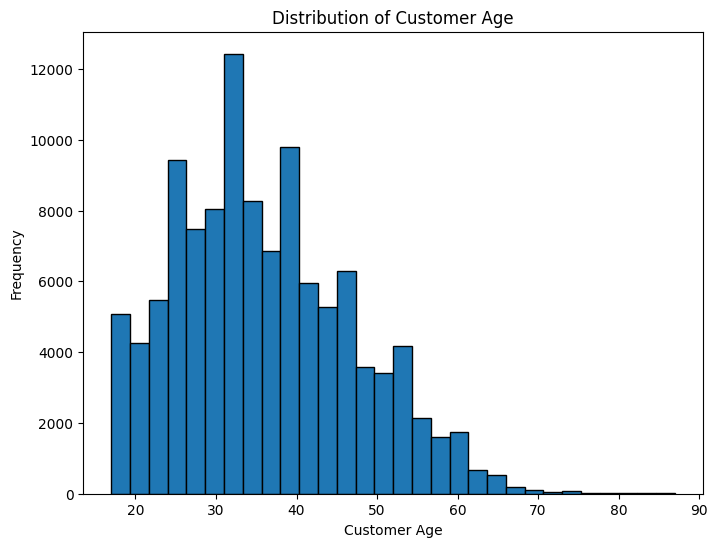

In [22]:
plt.figure(figsize=(8,6))
plt.hist(sales_data['Customer_Age'], bins=30, edgecolor='black')
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.show()

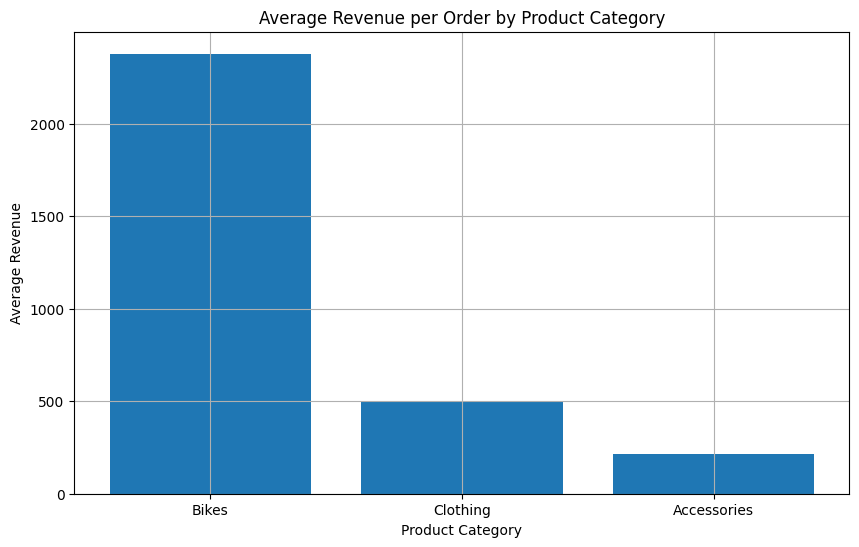

In [28]:
category_revenue = sales_data.groupby('Product_Category')['Revenue'].mean().reset_index()

category_revenue = category_revenue.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(category_revenue['Product_Category'], category_revenue['Revenue'])
plt.title("Average Revenue per Order by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Revenue")
plt.grid(True)
plt.show()

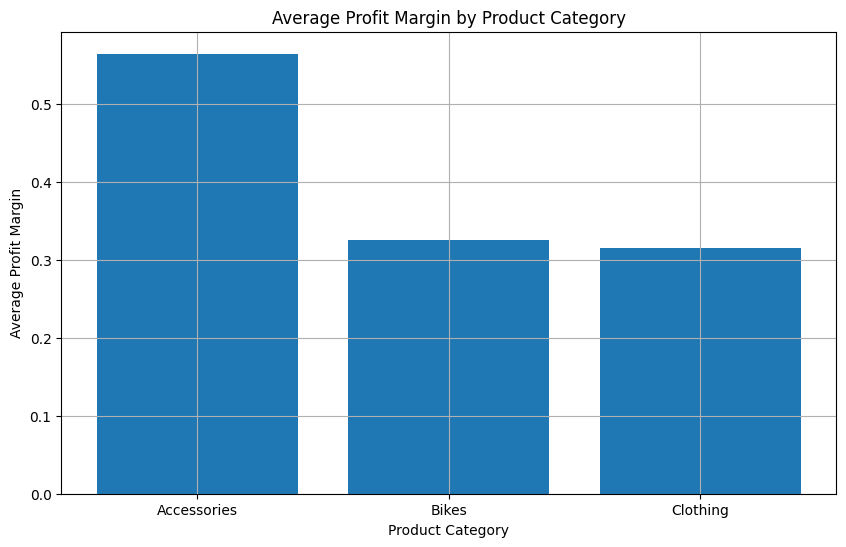

In [27]:
if 'Profit_Margin' not in sales_data.columns:
    sales_data['Profit_Margin'] = sales_data['Profit'] / sales_data['Revenue']

category_profit_margin = sales_data.groupby('Product_Category')['Profit_Margin'].mean().reset_index()

category_profit_margin = category_profit_margin.sort_values(by='Profit_Margin', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(category_profit_margin['Product_Category'], category_profit_margin['Profit_Margin'])
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")
plt.grid(True)
plt.show()

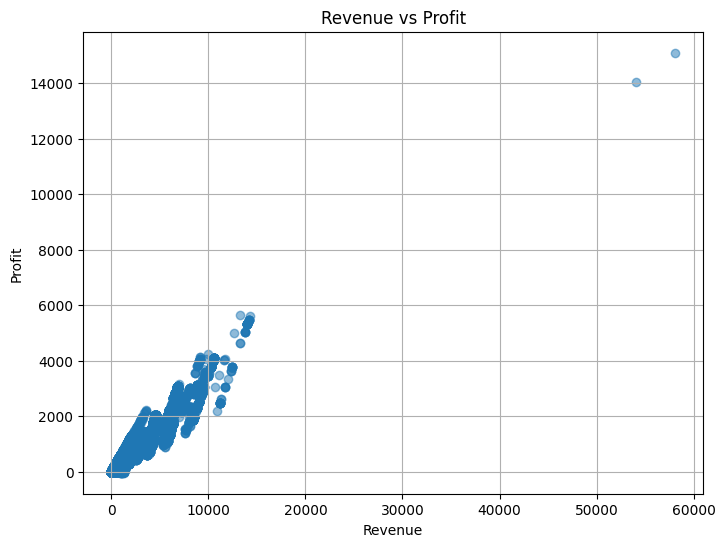

Correlation between Revenue and Profit: 0.9565716640736271


In [30]:
plt.figure(figsize=(8,6))
plt.scatter(sales_data['Revenue'], sales_data['Profit'], alpha=0.5)
plt.title("Revenue vs Profit")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

correlation = sales_data['Revenue'].corr(sales_data['Profit'])
print("Correlation between Revenue and Profit:", correlation)

# **Insights and Recommendations**


---

# **Monthly Revenue Trend**
- The chart indicates periods of high and low sales

**Recommendation:**
- I recommend to increase marketing effots during periods of high sales to further increase revenue  
- During periods of low sales, we need to re-think our marketing initiative and come up with a better plan


# **Costumer Age**
- The bar chart reveals that the majority of our cosutmers are age 26-40

**Recommendation:**
- Create marketing campaigns specifically designed for this age group



# **Product Performance**
- The bar chart for average revenue per order highlights which product categories are driving total revenue

**Recommendation:**
- See Profitability Analysis (next section), as these go head to head




 # **Profitability Analysis**
- The profit margin analysis shows differences in profitability across product categories

**Recommendation:**
- Since accessories have the highest profit margin, increase marketing effots and promotions to boost the overall profitability
- Continue the support for bikes, as they have the highest revenue, but look into ways to increase their profit margin
- Evaluate pricing for both categories and find an approach that maximizes revenue and profit




# **Revenue and Profit Correlation**
   - A strong positive correlation between revenue and profit suggests that increasing overall sales will likely boost profit

**Recommendation**
- Implement strategies to increase sales volume while keeping an eye on cost control (Bundle Pricing)

# **Conclusion & Future Work**


---


**Summary of Findings:**
- **Monthly Revenue Trend:**  
  The analysis shows clear seasonal trends, with distinct periods of high and low sales.
- **Customer Demographics:**  
  The age distribution indicates the dominant customer segments.
- **Product Performance:**  
  While bikes generate the highest total revenue, accessories lead in profit margin.
- **Profitability Analysis:**  
  Accessories, despite lower overall revenue, offer higher profit margins compared to bikes.


**Business Implications:**
- Focus marketing efforts on accessories to maximize profitability.
- Continue promoting bikes due to their strong revenue performance, but explore strategies to improve their profit margins.
- Consider cross-promotional strategies to leverage the strengths of both categories.

**Future Work:**
- Implement predictive models to forecast future sales trends.
- Conduct deeper analysis on cost structures and pricing strategies to further optimize profit margins.